<a href="https://colab.research.google.com/github/s83512266/Tibame_AI_111-2_group2_project/blob/main/Data_generator_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.5 MB/s 


In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt # seaborn
from PIL import Image

import os # file path
from glob import glob # search files
from tqdm.auto import tqdm # progress bar

import tensorflow as tf
from tensorflow.keras import layers, models, utils
import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split

# Read one image


In [22]:
IMG_SIZE = 256 # 256 128 64
BATCH_SIZE = 64

all_class = ['MD_Normal', 'MD_old_water', 'MD_sunburnt', 'MD_bac_fungi', 'Others']
class_map = {cls: i for i, cls in enumerate(all_class)} 
#  'MD_Normal':0, 'MD_old_water':1, 'MD_sunburnt':2, 'MD_bac_fungi':3, 'Others':4
class_map

{'MD_Normal': 0,
 'MD_old_water': 1,
 'MD_sunburnt': 2,
 'MD_bac_fungi': 3,
 'Others': 4}

In [23]:
MD_path = glob("/content/drive/MyDrive/圖片/(a.b) 正常龜背芋/train/*.jpg")
MD_old_water_path = glob("/content/drive/MyDrive/圖片/(c.e.f) 老化、水和空氣/train/*.jpg")
MD_sunburnt_path = glob("/content/drive/MyDrive/圖片/(d)曬傷/train/*.jpg")
MD_bac_fungi_path = glob("/content/drive/MyDrive/圖片/(g.h)真菌/train/*.jpg")
Others_path = glob("/content/drive/MyDrive/圖片/(i)非龜背芋種/train/*.jpg")

img_paths = MD_path + MD_old_water_path + MD_sunburnt_path + MD_bac_fungi_path + Others_path

# number of images
print('img_paths:', len(img_paths))
print('MD_path:', len(MD_path))
print('MD_old_water_path:', len(MD_old_water_path))
print('MD_sunburnt_path:', len(MD_sunburnt_path))
print('MD_bac_fungi_path:', len(MD_bac_fungi_path))
print('Others_path:', len(Others_path))

img_paths: 1601
MD_path: 639
MD_old_water_path: 137
MD_sunburnt_path: 69
MD_bac_fungi_path: 71
Others_path: 685


In [24]:
from sklearn.model_selection import train_test_split
# split train and test dataset
MD_path_train, MD_path_test = train_test_split(MD_path, test_size=0.2)
MD_old_water_path_train, MD_old_water_path_test = train_test_split(MD_old_water_path, test_size=0.2)
MD_sunburnt_path_train, MD_sunburnt_path_test = train_test_split(MD_sunburnt_path, test_size=0.2)
MD_bac_fungi_path_train, MD_bac_fungi_path_test = train_test_split(MD_bac_fungi_path, test_size=0.2)
Others_path_train, Others_path_test = train_test_split(Others_path, test_size=0.2)

# split test and val dataset
MD_path_test, MD_path_val = train_test_split(MD_path_test, test_size=0.5)
MD_old_water_path_test, MD_old_water_path_val = train_test_split(MD_old_water_path_test, test_size=0.5)
MD_sunburnt_path_test, MD_sunburnt_path_val = train_test_split(MD_sunburnt_path_test, test_size=0.5)
MD_bac_fungi_path_test, MD_bac_fungi_path_val = train_test_split(MD_bac_fungi_path_test, test_size=0.5)
Others_path_test, Others_path_val = train_test_split(Others_path_test, test_size=0.5)

MD_sick_paths_train = MD_old_water_path_train + MD_sunburnt_path_train + MD_bac_fungi_path_train
MD_sick_paths_val = MD_old_water_path_val + MD_sunburnt_path_val + MD_bac_fungi_path_val
img_paths_train = MD_path_train + MD_sick_paths_train + MD_sick_paths_train + MD_sick_paths_train + Others_path_train
img_paths_val = MD_path_val + MD_sick_paths_val + MD_sick_paths_val + MD_sick_paths_val + Others_path_val
img_paths_test = MD_path_test + MD_old_water_path_test + MD_sunburnt_path_test + MD_bac_fungi_path_test + Others_path_test

# number of train images
print('img_paths_train:', len(img_paths_train))
print('MD_path_train:', len(MD_path_train))
print('MD_old_water_path_train:', len(MD_old_water_path_train))
print('MD_sunburnt_path_train:', len(MD_sunburnt_path_train))
print('MD_bac_fungi_path_train:', len(MD_bac_fungi_path_train))
print('Others_path_train:', len(Others_path_train))
print('MD_sick_paths_train:', len(MD_sick_paths_train))

# number of val images
print('img_paths_val:', len(img_paths_val))
print('MD_path_val:', len(MD_path_val))
print('MD_old_water_path_val:', len(MD_old_water_path_val))
print('MD_sunburnt_path_val:', len(MD_sunburnt_path_val))
print('MD_bac_fungi_path_val:', len(MD_bac_fungi_path_val))
print('Others_path_val:', len(Others_path_val))
print('MD_sick_paths_val:', len(MD_sick_paths_val))

# number of test images
print('img_paths_test:', len(img_paths_test))
print('MD_path_test:', len(MD_path_test))
print('MD_old_water_path_test:', len(MD_old_water_path_test))
print('MD_sunburnt_path_test:', len(MD_sunburnt_path_test))
print('MD_bac_fungi_path_test:', len(MD_bac_fungi_path_test))
print('Others_path_test:', len(Others_path_test))


img_paths_train: 1719
MD_path_train: 511
MD_old_water_path_train: 109
MD_sunburnt_path_train: 55
MD_bac_fungi_path_train: 56
Others_path_train: 548
MD_sick_paths_train: 220
img_paths_val: 220
MD_path_val: 64
MD_old_water_path_val: 14
MD_sunburnt_path_val: 7
MD_bac_fungi_path_val: 8
Others_path_val: 69
MD_sick_paths_val: 29
img_paths_test: 160
MD_path_test: 64
MD_old_water_path_test: 14
MD_sunburnt_path_test: 7
MD_bac_fungi_path_test: 7
Others_path_test: 68


/content/drive/MyDrive/圖片/(a.b) 正常龜背芋/train/1.jpg
(3000, 3000, 3)


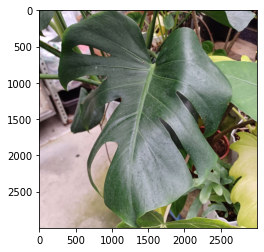

In [66]:
# show image
path = img_paths[0]
path1 = MD_path[1]
img = cv2.imread(path1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(path)
print(img.shape)
plt.imshow(img)
plt.show()

((3000, 3000, 3), (256, 256, 3))

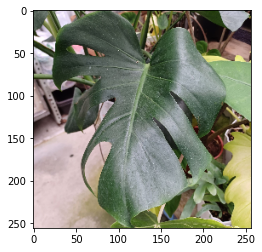

In [67]:
# Resize  img
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(img_resized)
img.shape, img_resized.shape

In [68]:
# Extract img class
# os.sep: /
print(path)
cls = path.split(os.sep)[-3]
print(cls)

/content/drive/MyDrive/圖片/(a.b) 正常龜背芋/train/1.jpg
(a.b) 正常龜背芋


In [69]:
# Get file class index for train

# for MD_Normal class
if cls == '(a.b) 正常龜背芋':
    cls_idx = class_map["MD_Normal"]
    print(cls_idx)
# for sick class
elif cls == '(c.e.f) 老化、水和空氣':
    cls_idx = class_map["MD_old_water"]
    print(cls_idx)
elif cls == '(d)曬傷':
    cls_idx = class_map["MD_sunburnt"]
    print(cls_idx)
elif cls == '(g.h)真菌':
    cls_idx = class_map["MD_bac_fungi"]
    print(cls_idx)
# for others class
else:
    cls_idx = class_map["Others"]
    print(cls_idx)

0


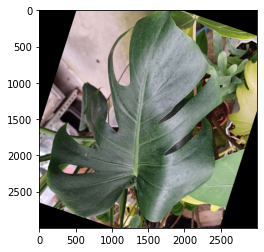

In [70]:
import imgaug as ia
import imgaug.augmenters as iaa

aug = iaa.Sequential([iaa.Fliplr(0.5), # 50% horizontal flip
        iaa.Flipud(0.5), # 50% vertical flip
        iaa.Affine(
              rotate=(-30, 30), # random rotate -30 ~ +30 degree
              shear=(-16, 16), # random shear -16 ~ +16 degree
              scale={"x": (0.8, 1.2), "y": (0.8, 1.2)} # scale x, y: 80%~120%
              )
        ])

img = aug.augment_image(img)
plt.imshow(img)

# Data Generator

https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence

*   def \_\_len\_\_: number of **batches** per epoch
*   def \_\_getitem\_\_(idx): get the idx-th batch
* def \_\_on_epoch_end\_\_: called at the end of epoch


In [26]:
import imgaug as ia
import imgaug.augmenters as iaa

class DataGenerator(utils.Sequence):
    def __init__(self, paths, batch_size, img_size, mode='train'):
        self.paths = paths
        self.batch_size = batch_size
        self.mode = mode
        self.img_size = img_size

        self.shuffle = mode == 'train'
        self.idxs = np.arange(len(self.paths)) # [0, 1, 2, ..., len(self.paths)-1]
        self.all_class = ['MD_Normal', 'MD_old_water', 'MD_sunburnt', 'MD_bac_fungi', 'Others']
        self.class_map = {cls: i for i, cls in enumerate(all_class)}
        self.num_classes = len(self.class_map)
        self.on_epoch_end()
        # augmentation
        self.aug = iaa.Sequential([
            iaa.Fliplr(0.5), # 50% horizontal flip
            iaa.Flipud(0.5), # 50% vertical flip
            iaa.Affine(
                rotate=(-30, 30), # random rotate -30 ~ +30 degree
                shear=(-16, 16), # random shear -16 ~ +16 degree
                scale={"x": (0.8, 1.2), "y": (0.8, 1.2)} # scale x, y: 80%~120%
                )
        ])

    def __len__(self):
        'number of batches per epoch'
        return int(np.ceil(len(self.paths) / self.batch_size))

    def __getitem__(self, batch_index):
        'Generate one batch of data'
        # Generate idxs of the batch
        idxs = self.idxs[batch_index*self.batch_size: (batch_index+1)*self.batch_size]
        # Find list of IDs
        batch_paths = [self.paths[i] for i in idxs]
        # Generate data
        return self.__data_generation(batch_paths)

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        if self.shuffle:
            np.random.shuffle(self.idxs)

    def __data_generation(self, paths):
        """
        Generates data containing batch_size samples
        """
        x = np.empty((len(paths), self.img_size, self.img_size, 3), dtype=np.float32)
        y = np.empty((len(paths)))

        for i, path in enumerate(tqdm(paths)):
            # read image
            img = cv2.imread(path) # (H, W, 3)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) # resize
            

            # # TODO: Data Augmentation
            if self.mode == 'train':
                img = self.aug.augment_image(img)

            # Preprocess
            # img = img / 255.
            img = tf.keras.applications.efficientnet_v2.preprocess_input(img, data_format=None)
            x[i] = img            

            # read class label
            cls = path.split(os.sep)[-3]
            if cls == '(a.b) 正常龜背芋':
                cls_idx = class_map["MD_Normal"]
            # for new_leaf class
            elif cls == '(c.e.f) 老化、水和空氣':
                cls_idx = class_map["MD_old_water"]
            elif cls == '(d)曬傷':
                cls_idx = class_map["MD_sunburnt"]
            elif cls == '(g.h)真菌':
                cls_idx = class_map["MD_bac_fungi"]
            # for others class
            else:
                cls_idx = class_map["Others"]
            y[i] = cls_idx
            
        # one-hot encoding
        y = tf.keras.utils.to_categorical(y, num_classes=self.num_classes)
        return x, y
        

In [27]:
gen_train = DataGenerator(img_paths_train, BATCH_SIZE, IMG_SIZE, mode='train')
gen_val = DataGenerator(img_paths_val, BATCH_SIZE, IMG_SIZE, mode='val')
gen_test = DataGenerator(img_paths_test, BATCH_SIZE, IMG_SIZE, mode='test')

In [73]:
gen_train.idxs

array([  46,   52,  464, ...,  870, 1575,  212])

In [74]:
# def __len__(): batches per opech
len(gen_train), len(gen_val)

(27, 4)

In [75]:
# get 1 batch
# def __getitem__(self, batch_idx)
imgs, labels = gen_train[0]

  0%|          | 0/64 [00:00<?, ?it/s]

In [76]:
imgs.shape, labels.shape

((64, 256, 256, 3), (64, 5))

In [77]:
# for i in range(len(imgs)):
#     label = labels[i]
#     class_idx = np.argmax(label)
#     print('label: ', label)
#     print('class idx:', class_idx)
#     print('class name: ', all_class[class_idx])
#     plt.imshow(imgs[i])
#     plt.show()

# Build model

In [78]:
base_model = tf.keras.applications.EfficientNetV2M(include_top=False, 
                          weights='imagenet',
                          input_shape=(IMG_SIZE, IMG_SIZE, 3))

x = layers.GlobalAveragePooling2D()(base_model.output) 
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(5, activation='softmax')(x)

# Freeze layers
for l in base_model.layers:
    l.trainable = False

model = models.Model(base_model.input, x)

In [79]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 256, 256, 3)  0           ['input_3[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 128, 128, 24  648         ['rescaling_2[0][0]']            
                                )                                                                 
                                                                                            

In [80]:
# y_train是one-hot encoding，不能使用SparseCategoricalCrossentropy()

model.compile(loss=tfa.losses.SigmoidFocalCrossEntropy(),
      # loss=tf.keras.losses.CategoricalCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['accuracy'])

In [81]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
    ModelCheckpoint("/content/drive/MyDrive/generator_v2.h5", save_best_only=True),
    # subclassed models不能使用ModelCheckpoint存模型
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.3)
    # 當模型連續訓練n次沒有更好，就進行一次學習率衰降。
]

In [82]:
logs = model.fit(gen_train,
          # steps_per_epoch=len(gen_train) // BATCH_SIZE,
          epochs=50,
          validation_data=gen_val,
          callbacks=callbacks
    )

  0%|          | 0/64 [00:00<?, ?it/s]

Epoch 1/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 10:15 - loss: 0.3008 - accuracy: 0.1875

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:05 - loss: 0.2959 - accuracy: 0.2031 

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:17 - loss: 0.2858 - accuracy: 0.2604

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:12 - loss: 0.2822 - accuracy: 0.2695

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:01 - loss: 0.2797 - accuracy: 0.2844

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 1:56 - loss: 0.2712 - accuracy: 0.3385

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 1:50 - loss: 0.2667 - accuracy: 0.3549

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:46 - loss: 0.2633 - accuracy: 0.3672

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:39 - loss: 0.2605 - accuracy: 0.3802

  0%|          | 0/55 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:34 - loss: 0.2584 - accuracy: 0.3891

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:28 - loss: 0.2550 - accuracy: 0.3957

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:25 - loss: 0.2508 - accuracy: 0.4111

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:19 - loss: 0.2464 - accuracy: 0.4241

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:13 - loss: 0.2431 - accuracy: 0.4386

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:08 - loss: 0.2407 - accuracy: 0.4479

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:02 - loss: 0.2369 - accuracy: 0.4591

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 56s - loss: 0.2346 - accuracy: 0.4662 

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 50s - loss: 0.2327 - accuracy: 0.4751

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 45s - loss: 0.2297 - accuracy: 0.4847

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 39s - loss: 0.2270 - accuracy: 0.4917

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 33s - loss: 0.2257 - accuracy: 0.4951

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 28s - loss: 0.2231 - accuracy: 0.5039

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 22s - loss: 0.2219 - accuracy: 0.5044

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 16s - loss: 0.2206 - accuracy: 0.5088

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 11s - loss: 0.2191 - accuracy: 0.5129

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.2149 - accuracy: 0.5236

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 205s 7s/step - loss: 0.2149 - accuracy: 0.5236 - val_loss: 0.1978 - val_accuracy: 0.5182 - lr: 0.0010
Epoch 2/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:37 - loss: 0.1658 - accuracy: 0.6719

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:12 - loss: 0.1611 - accuracy: 0.6807

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:17 - loss: 0.1501 - accuracy: 0.6940

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:14 - loss: 0.1478 - accuracy: 0.6842

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:08 - loss: 0.1518 - accuracy: 0.6817

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:01 - loss: 0.1471 - accuracy: 0.6933

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 1:54 - loss: 0.1496 - accuracy: 0.6902

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:49 - loss: 0.1556 - accuracy: 0.6859

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:41 - loss: 0.1520 - accuracy: 0.6931

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:35 - loss: 0.1499 - accuracy: 0.6973

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:28 - loss: 0.1512 - accuracy: 0.7022

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:24 - loss: 0.1482 - accuracy: 0.7088

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:19 - loss: 0.1488 - accuracy: 0.7072

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:13 - loss: 0.1483 - accuracy: 0.7091

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:08 - loss: 0.1489 - accuracy: 0.7098

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:02 - loss: 0.1511 - accuracy: 0.7074

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 57s - loss: 0.1501 - accuracy: 0.7081 

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 51s - loss: 0.1501 - accuracy: 0.7087

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 46s - loss: 0.1500 - accuracy: 0.7092

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 40s - loss: 0.1512 - accuracy: 0.7042

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 34s - loss: 0.1515 - accuracy: 0.7041

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 28s - loss: 0.1515 - accuracy: 0.7026

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 22s - loss: 0.1524 - accuracy: 0.6992

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 17s - loss: 0.1524 - accuracy: 0.6988

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 11s - loss: 0.1525 - accuracy: 0.6977

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.1512 - accuracy: 0.6998

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 178s 7s/step - loss: 0.1512 - accuracy: 0.6998 - val_loss: 0.1719 - val_accuracy: 0.6273 - lr: 0.0010
Epoch 3/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 3:07 - loss: 0.1175 - accuracy: 0.7812

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:45 - loss: 0.1326 - accuracy: 0.7422

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:23 - loss: 0.1404 - accuracy: 0.7188

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:13 - loss: 0.1394 - accuracy: 0.7188

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:07 - loss: 0.1315 - accuracy: 0.7375

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:02 - loss: 0.1298 - accuracy: 0.7448

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 1:57 - loss: 0.1334 - accuracy: 0.7344

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:52 - loss: 0.1328 - accuracy: 0.7344

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:46 - loss: 0.1336 - accuracy: 0.7326

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:37 - loss: 0.1335 - accuracy: 0.7344

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:31 - loss: 0.1330 - accuracy: 0.7330

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:24 - loss: 0.1340 - accuracy: 0.7318

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:18 - loss: 0.1336 - accuracy: 0.7344

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:14 - loss: 0.1341 - accuracy: 0.7277

  0%|          | 0/55 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:09 - loss: 0.1321 - accuracy: 0.7323

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:03 - loss: 0.1303 - accuracy: 0.7399

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 57s - loss: 0.1295 - accuracy: 0.7414 

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 51s - loss: 0.1290 - accuracy: 0.7445

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 45s - loss: 0.1302 - accuracy: 0.7457

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 39s - loss: 0.1297 - accuracy: 0.7467

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 34s - loss: 0.1272 - accuracy: 0.7498

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 28s - loss: 0.1270 - accuracy: 0.7470

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 22s - loss: 0.1261 - accuracy: 0.7485

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 17s - loss: 0.1274 - accuracy: 0.7439

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 11s - loss: 0.1266 - accuracy: 0.7454

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.1263 - accuracy: 0.7469

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 181s 7s/step - loss: 0.1263 - accuracy: 0.7469 - val_loss: 0.1716 - val_accuracy: 0.5818 - lr: 0.0010
Epoch 4/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:38 - loss: 0.0867 - accuracy: 0.8438

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:06 - loss: 0.1100 - accuracy: 0.7731

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:14 - loss: 0.1185 - accuracy: 0.7486

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:07 - loss: 0.1281 - accuracy: 0.7449

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:02 - loss: 0.1250 - accuracy: 0.7524

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 1:55 - loss: 0.1258 - accuracy: 0.7440

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 1:49 - loss: 0.1240 - accuracy: 0.7517

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:44 - loss: 0.1210 - accuracy: 0.7594

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:40 - loss: 0.1229 - accuracy: 0.7549

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:34 - loss: 0.1232 - accuracy: 0.7512

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:29 - loss: 0.1232 - accuracy: 0.7482

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:24 - loss: 0.1234 - accuracy: 0.7497

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:17 - loss: 0.1216 - accuracy: 0.7546

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:11 - loss: 0.1205 - accuracy: 0.7554

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:07 - loss: 0.1197 - accuracy: 0.7634

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:01 - loss: 0.1165 - accuracy: 0.7714

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 56s - loss: 0.1164 - accuracy: 0.7702 

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 51s - loss: 0.1145 - accuracy: 0.7743

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 45s - loss: 0.1150 - accuracy: 0.7730

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 39s - loss: 0.1144 - accuracy: 0.7742

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 34s - loss: 0.1127 - accuracy: 0.7768

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 28s - loss: 0.1126 - accuracy: 0.7763

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 23s - loss: 0.1126 - accuracy: 0.7758

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 17s - loss: 0.1132 - accuracy: 0.7754

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 11s - loss: 0.1137 - accuracy: 0.7769

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.1121 - accuracy: 0.7813

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 181s 7s/step - loss: 0.1121 - accuracy: 0.7813 - val_loss: 0.1466 - val_accuracy: 0.7136 - lr: 0.0010
Epoch 5/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 3:16 - loss: 0.0840 - accuracy: 0.8125

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:35 - loss: 0.0940 - accuracy: 0.7969

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:21 - loss: 0.0925 - accuracy: 0.7969

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:14 - loss: 0.0975 - accuracy: 0.7930

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:08 - loss: 0.0966 - accuracy: 0.7906

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:02 - loss: 0.0998 - accuracy: 0.7786

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 1:56 - loss: 0.1008 - accuracy: 0.7835

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:50 - loss: 0.0997 - accuracy: 0.7910

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:43 - loss: 0.0973 - accuracy: 0.8003

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:37 - loss: 0.0951 - accuracy: 0.8078

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:32 - loss: 0.0970 - accuracy: 0.8111

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:25 - loss: 0.0986 - accuracy: 0.8086

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:20 - loss: 0.0977 - accuracy: 0.8125

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:15 - loss: 0.0962 - accuracy: 0.8203

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:10 - loss: 0.0968 - accuracy: 0.8198

  0%|          | 0/55 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:04 - loss: 0.0958 - accuracy: 0.8223

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 57s - loss: 0.0965 - accuracy: 0.8193 

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 52s - loss: 0.0964 - accuracy: 0.8163

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 46s - loss: 0.0958 - accuracy: 0.8202

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 40s - loss: 0.0958 - accuracy: 0.8198

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 34s - loss: 0.0946 - accuracy: 0.8232

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 29s - loss: 0.0936 - accuracy: 0.8234

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 23s - loss: 0.0934 - accuracy: 0.8237

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 17s - loss: 0.0937 - accuracy: 0.8219

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 11s - loss: 0.0927 - accuracy: 0.8221

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0922 - accuracy: 0.8243

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 205s 8s/step - loss: 0.0922 - accuracy: 0.8243 - val_loss: 0.1448 - val_accuracy: 0.7364 - lr: 0.0010
Epoch 6/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:58 - loss: 0.0757 - accuracy: 0.8594

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:28 - loss: 0.0762 - accuracy: 0.8516

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:26 - loss: 0.0762 - accuracy: 0.8594

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:14 - loss: 0.0713 - accuracy: 0.8750

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:09 - loss: 0.0778 - accuracy: 0.8750

  0%|          | 0/55 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:03 - loss: 0.0779 - accuracy: 0.8698

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 1:55 - loss: 0.0806 - accuracy: 0.8588

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:50 - loss: 0.0800 - accuracy: 0.8549

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:42 - loss: 0.0811 - accuracy: 0.8589

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:38 - loss: 0.0818 - accuracy: 0.8605

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:33 - loss: 0.0831 - accuracy: 0.8561

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:26 - loss: 0.0831 - accuracy: 0.8551

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:20 - loss: 0.0853 - accuracy: 0.8481

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:14 - loss: 0.0870 - accuracy: 0.8399

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:09 - loss: 0.0888 - accuracy: 0.8381

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:03 - loss: 0.0877 - accuracy: 0.8424

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 58s - loss: 0.0874 - accuracy: 0.8434 

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 52s - loss: 0.0866 - accuracy: 0.8451

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 46s - loss: 0.0880 - accuracy: 0.8401

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 40s - loss: 0.0884 - accuracy: 0.8363

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 34s - loss: 0.0889 - accuracy: 0.8367

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 28s - loss: 0.0881 - accuracy: 0.8349

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 23s - loss: 0.0905 - accuracy: 0.8346

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 17s - loss: 0.0914 - accuracy: 0.8330

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 11s - loss: 0.0899 - accuracy: 0.8360

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0899 - accuracy: 0.8348

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 184s 7s/step - loss: 0.0899 - accuracy: 0.8348 - val_loss: 0.1301 - val_accuracy: 0.7273 - lr: 0.0010
Epoch 7/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:57 - loss: 0.0683 - accuracy: 0.8281

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:38 - loss: 0.0775 - accuracy: 0.8438

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:25 - loss: 0.0816 - accuracy: 0.8333

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:20 - loss: 0.0856 - accuracy: 0.8359

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:15 - loss: 0.0886 - accuracy: 0.8313

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:07 - loss: 0.0871 - accuracy: 0.8385

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 1:57 - loss: 0.0868 - accuracy: 0.8415

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:51 - loss: 0.0844 - accuracy: 0.8418

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:46 - loss: 0.0838 - accuracy: 0.8455

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:40 - loss: 0.0838 - accuracy: 0.8438

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:34 - loss: 0.0821 - accuracy: 0.8480

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:28 - loss: 0.0802 - accuracy: 0.8516

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:22 - loss: 0.0799 - accuracy: 0.8510

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:16 - loss: 0.0825 - accuracy: 0.8449

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:11 - loss: 0.0818 - accuracy: 0.8427

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:05 - loss: 0.0816 - accuracy: 0.8418

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 59s - loss: 0.0815 - accuracy: 0.8382 

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 53s - loss: 0.0816 - accuracy: 0.8394

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 47s - loss: 0.0821 - accuracy: 0.8396

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 41s - loss: 0.0829 - accuracy: 0.8375

  0%|          | 0/55 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 35s - loss: 0.0825 - accuracy: 0.8393

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 29s - loss: 0.0821 - accuracy: 0.8399

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 23s - loss: 0.0816 - accuracy: 0.8394

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 17s - loss: 0.0825 - accuracy: 0.8389

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 11s - loss: 0.0812 - accuracy: 0.8422

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0807 - accuracy: 0.8429

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 180s 7s/step - loss: 0.0807 - accuracy: 0.8429 - val_loss: 0.1346 - val_accuracy: 0.7545 - lr: 0.0010
Epoch 8/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:52 - loss: 0.0368 - accuracy: 0.9375

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:31 - loss: 0.0508 - accuracy: 0.9062

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:21 - loss: 0.0544 - accuracy: 0.8958

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:17 - loss: 0.0564 - accuracy: 0.8984

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:11 - loss: 0.0569 - accuracy: 0.9031

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:02 - loss: 0.0598 - accuracy: 0.8958

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 1:57 - loss: 0.0632 - accuracy: 0.8862

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:54 - loss: 0.0647 - accuracy: 0.8848

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:48 - loss: 0.0700 - accuracy: 0.8733

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:42 - loss: 0.0709 - accuracy: 0.8687

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:35 - loss: 0.0728 - accuracy: 0.8636

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:29 - loss: 0.0743 - accuracy: 0.8620

  0%|          | 0/55 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:22 - loss: 0.0736 - accuracy: 0.8654

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:15 - loss: 0.0725 - accuracy: 0.8670

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:10 - loss: 0.0714 - accuracy: 0.8675

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:03 - loss: 0.0714 - accuracy: 0.8680

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 58s - loss: 0.0700 - accuracy: 0.8730 

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 52s - loss: 0.0714 - accuracy: 0.8723

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 46s - loss: 0.0710 - accuracy: 0.8724

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 40s - loss: 0.0709 - accuracy: 0.8718

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 34s - loss: 0.0696 - accuracy: 0.8734

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 28s - loss: 0.0692 - accuracy: 0.8728

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 23s - loss: 0.0690 - accuracy: 0.8735

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 17s - loss: 0.0687 - accuracy: 0.8730

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 11s - loss: 0.0687 - accuracy: 0.8724

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0693 - accuracy: 0.8703

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 181s 7s/step - loss: 0.0693 - accuracy: 0.8703 - val_loss: 0.1326 - val_accuracy: 0.7182 - lr: 0.0010
Epoch 9/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:33 - loss: 0.0634 - accuracy: 0.9062

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:39 - loss: 0.0628 - accuracy: 0.9062

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:31 - loss: 0.0714 - accuracy: 0.8750

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:21 - loss: 0.0738 - accuracy: 0.8594

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:13 - loss: 0.0706 - accuracy: 0.8625

  0%|          | 0/55 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:07 - loss: 0.0733 - accuracy: 0.8542

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 1:56 - loss: 0.0762 - accuracy: 0.8497

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:51 - loss: 0.0701 - accuracy: 0.8648

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:46 - loss: 0.0708 - accuracy: 0.8660

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:39 - loss: 0.0695 - accuracy: 0.8732

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:33 - loss: 0.0722 - accuracy: 0.8662

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:28 - loss: 0.0722 - accuracy: 0.8643

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:22 - loss: 0.0711 - accuracy: 0.8688

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:16 - loss: 0.0698 - accuracy: 0.8703

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:10 - loss: 0.0701 - accuracy: 0.8696

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:04 - loss: 0.0695 - accuracy: 0.8700

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 59s - loss: 0.0684 - accuracy: 0.8740 

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 53s - loss: 0.0705 - accuracy: 0.8696

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 47s - loss: 0.0692 - accuracy: 0.8732

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 41s - loss: 0.0686 - accuracy: 0.8733

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 35s - loss: 0.0679 - accuracy: 0.8749

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 29s - loss: 0.0669 - accuracy: 0.8778

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 23s - loss: 0.0661 - accuracy: 0.8797

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 17s - loss: 0.0671 - accuracy: 0.8808

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 11s - loss: 0.0668 - accuracy: 0.8825

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0679 - accuracy: 0.8784

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 193s 7s/step - loss: 0.0679 - accuracy: 0.8784 - val_loss: 0.1162 - val_accuracy: 0.7818 - lr: 0.0010
Epoch 10/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:46 - loss: 0.0423 - accuracy: 0.9531

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:40 - loss: 0.0456 - accuracy: 0.9297

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:21 - loss: 0.0519 - accuracy: 0.9115

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:22 - loss: 0.0578 - accuracy: 0.9023

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:18 - loss: 0.0598 - accuracy: 0.8906

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:10 - loss: 0.0606 - accuracy: 0.8854

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 2:04 - loss: 0.0617 - accuracy: 0.8839

  0%|          | 0/55 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:58 - loss: 0.0590 - accuracy: 0.8887

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:48 - loss: 0.0594 - accuracy: 0.8871

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:42 - loss: 0.0571 - accuracy: 0.8938

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:37 - loss: 0.0563 - accuracy: 0.8978

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:32 - loss: 0.0551 - accuracy: 0.9012

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:26 - loss: 0.0546 - accuracy: 0.9028

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:19 - loss: 0.0528 - accuracy: 0.9076

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:13 - loss: 0.0541 - accuracy: 0.9043

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:07 - loss: 0.0550 - accuracy: 0.9005

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 1:01 - loss: 0.0556 - accuracy: 0.9008

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 54s - loss: 0.0562 - accuracy: 0.9003 

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 48s - loss: 0.0561 - accuracy: 0.9006

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 42s - loss: 0.0556 - accuracy: 0.9017

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 36s - loss: 0.0560 - accuracy: 0.9004

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 30s - loss: 0.0561 - accuracy: 0.9006

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 24s - loss: 0.0554 - accuracy: 0.9043

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 18s - loss: 0.0558 - accuracy: 0.9031

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 12s - loss: 0.0571 - accuracy: 0.9007

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0563 - accuracy: 0.9023

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 183s 7s/step - loss: 0.0563 - accuracy: 0.9023 - val_loss: 0.1273 - val_accuracy: 0.7545 - lr: 0.0010
Epoch 11/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:58 - loss: 0.0430 - accuracy: 0.9688

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:23 - loss: 0.0381 - accuracy: 0.9609

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:27 - loss: 0.0488 - accuracy: 0.9115

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:22 - loss: 0.0487 - accuracy: 0.9102

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:15 - loss: 0.0501 - accuracy: 0.9156

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:11 - loss: 0.0511 - accuracy: 0.9167

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 2:00 - loss: 0.0528 - accuracy: 0.9152

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:54 - loss: 0.0503 - accuracy: 0.9199

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:47 - loss: 0.0508 - accuracy: 0.9167

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:40 - loss: 0.0514 - accuracy: 0.9156

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:34 - loss: 0.0497 - accuracy: 0.9176

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:27 - loss: 0.0497 - accuracy: 0.9180

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:21 - loss: 0.0498 - accuracy: 0.9195

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:15 - loss: 0.0504 - accuracy: 0.9185

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:11 - loss: 0.0509 - accuracy: 0.9125

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:05 - loss: 0.0508 - accuracy: 0.9121

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 1:00 - loss: 0.0504 - accuracy: 0.9136

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 54s - loss: 0.0503 - accuracy: 0.9141 

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 48s - loss: 0.0501 - accuracy: 0.9145

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 41s - loss: 0.0497 - accuracy: 0.9141

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 36s - loss: 0.0541 - accuracy: 0.9092

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 30s - loss: 0.0542 - accuracy: 0.9084

  0%|          | 0/55 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 24s - loss: 0.0546 - accuracy: 0.9062

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 18s - loss: 0.0542 - accuracy: 0.9077

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 12s - loss: 0.0539 - accuracy: 0.9076

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0549 - accuracy: 0.9069

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 184s 7s/step - loss: 0.0549 - accuracy: 0.9069 - val_loss: 0.1398 - val_accuracy: 0.7682 - lr: 0.0010
Epoch 12/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:44 - loss: 0.0663 - accuracy: 0.9062

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:31 - loss: 0.0732 - accuracy: 0.8828

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:32 - loss: 0.0637 - accuracy: 0.8906

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:32 - loss: 0.0584 - accuracy: 0.8984

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:23 - loss: 0.0632 - accuracy: 0.8875

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:16 - loss: 0.0589 - accuracy: 0.8958

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 2:07 - loss: 0.0564 - accuracy: 0.9040

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 2:00 - loss: 0.0541 - accuracy: 0.9062

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:51 - loss: 0.0561 - accuracy: 0.9010

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:46 - loss: 0.0558 - accuracy: 0.9062

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:40 - loss: 0.0550 - accuracy: 0.9091

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:34 - loss: 0.0582 - accuracy: 0.9036

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:26 - loss: 0.0596 - accuracy: 0.8990

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:21 - loss: 0.0604 - accuracy: 0.8962

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:14 - loss: 0.0609 - accuracy: 0.8979

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:07 - loss: 0.0592 - accuracy: 0.9014

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 1:01 - loss: 0.0606 - accuracy: 0.9007

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 55s - loss: 0.0597 - accuracy: 0.9010 

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 49s - loss: 0.0601 - accuracy: 0.9005

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 42s - loss: 0.0596 - accuracy: 0.9008

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 36s - loss: 0.0586 - accuracy: 0.9010

  0%|          | 0/55 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 30s - loss: 0.0588 - accuracy: 0.8977

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 24s - loss: 0.0581 - accuracy: 0.9002

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 18s - loss: 0.0587 - accuracy: 0.8998

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 12s - loss: 0.0579 - accuracy: 0.9019

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0584 - accuracy: 0.9017

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 184s 7s/step - loss: 0.0584 - accuracy: 0.9017 - val_loss: 0.1542 - val_accuracy: 0.7182 - lr: 0.0010
Epoch 13/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 3:16 - loss: 0.0731 - accuracy: 0.8750

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:13 - loss: 0.0650 - accuracy: 0.8984

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:15 - loss: 0.0649 - accuracy: 0.8906

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:12 - loss: 0.0596 - accuracy: 0.9023

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:11 - loss: 0.0631 - accuracy: 0.8938

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:05 - loss: 0.0586 - accuracy: 0.9010

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 1:58 - loss: 0.0555 - accuracy: 0.9062

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:51 - loss: 0.0573 - accuracy: 0.9043

  0%|          | 0/55 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:45 - loss: 0.0555 - accuracy: 0.9080

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:38 - loss: 0.0546 - accuracy: 0.9097

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:34 - loss: 0.0535 - accuracy: 0.9122

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:29 - loss: 0.0543 - accuracy: 0.9091

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:23 - loss: 0.0549 - accuracy: 0.9101

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:16 - loss: 0.0537 - accuracy: 0.9109

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:11 - loss: 0.0545 - accuracy: 0.9096

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:05 - loss: 0.0539 - accuracy: 0.9113

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 1:00 - loss: 0.0532 - accuracy: 0.9120

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 54s - loss: 0.0526 - accuracy: 0.9134 

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 48s - loss: 0.0514 - accuracy: 0.9163

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 42s - loss: 0.0511 - accuracy: 0.9158

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 36s - loss: 0.0507 - accuracy: 0.9154

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 30s - loss: 0.0493 - accuracy: 0.9192

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 24s - loss: 0.0497 - accuracy: 0.9173

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 18s - loss: 0.0495 - accuracy: 0.9181

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 12s - loss: 0.0501 - accuracy: 0.9151

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0492 - accuracy: 0.9168

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 187s 7s/step - loss: 0.0492 - accuracy: 0.9168 - val_loss: 0.1415 - val_accuracy: 0.7455 - lr: 3.0000e-04
Epoch 14/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:36 - loss: 0.0284 - accuracy: 1.0000

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:50 - loss: 0.0400 - accuracy: 0.9609

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:43 - loss: 0.0441 - accuracy: 0.9479

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:35 - loss: 0.0485 - accuracy: 0.9297

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:21 - loss: 0.0492 - accuracy: 0.9219

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:12 - loss: 0.0459 - accuracy: 0.9297

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 2:05 - loss: 0.0475 - accuracy: 0.9219

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:59 - loss: 0.0448 - accuracy: 0.9297

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:50 - loss: 0.0454 - accuracy: 0.9253

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:45 - loss: 0.0435 - accuracy: 0.9312

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:39 - loss: 0.0438 - accuracy: 0.9261

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:32 - loss: 0.0426 - accuracy: 0.9284

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:26 - loss: 0.0418 - accuracy: 0.9327

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:20 - loss: 0.0411 - accuracy: 0.9353

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:15 - loss: 0.0399 - accuracy: 0.9375

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:08 - loss: 0.0397 - accuracy: 0.9385

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 1:02 - loss: 0.0400 - accuracy: 0.9366

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 56s - loss: 0.0405 - accuracy: 0.9366 

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 49s - loss: 0.0429 - accuracy: 0.9326

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 43s - loss: 0.0444 - accuracy: 0.9297

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 37s - loss: 0.0445 - accuracy: 0.9293

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 30s - loss: 0.0437 - accuracy: 0.9304

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 24s - loss: 0.0434 - accuracy: 0.9307

  0%|          | 0/55 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 18s - loss: 0.0434 - accuracy: 0.9316

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 12s - loss: 0.0441 - accuracy: 0.9290

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9267

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 187s 7s/step - loss: 0.0445 - accuracy: 0.9267 - val_loss: 0.1321 - val_accuracy: 0.7682 - lr: 3.0000e-04
Epoch 15/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:36 - loss: 0.0307 - accuracy: 0.9375

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:19 - loss: 0.0313 - accuracy: 0.9328

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:25 - loss: 0.0343 - accuracy: 0.9344

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:14 - loss: 0.0374 - accuracy: 0.9312

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:12 - loss: 0.0377 - accuracy: 0.9325

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:09 - loss: 0.0381 - accuracy: 0.9307

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 2:02 - loss: 0.0349 - accuracy: 0.9385

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:55 - loss: 0.0383 - accuracy: 0.9264

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:49 - loss: 0.0382 - accuracy: 0.9277

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:43 - loss: 0.0406 - accuracy: 0.9223

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:37 - loss: 0.0395 - accuracy: 0.9237

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:31 - loss: 0.0402 - accuracy: 0.9223

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:24 - loss: 0.0423 - accuracy: 0.9198

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:17 - loss: 0.0429 - accuracy: 0.9188

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:12 - loss: 0.0430 - accuracy: 0.9201

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:07 - loss: 0.0418 - accuracy: 0.9232

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 1:01 - loss: 0.0417 - accuracy: 0.9222

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 55s - loss: 0.0419 - accuracy: 0.9204 

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 49s - loss: 0.0414 - accuracy: 0.9205

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 43s - loss: 0.0405 - accuracy: 0.9221

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 36s - loss: 0.0410 - accuracy: 0.9213

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 30s - loss: 0.0402 - accuracy: 0.9235

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 24s - loss: 0.0406 - accuracy: 0.9234

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 18s - loss: 0.0400 - accuracy: 0.9253

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 12s - loss: 0.0398 - accuracy: 0.9258

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.9255

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 187s 7s/step - loss: 0.0396 - accuracy: 0.9255 - val_loss: 0.1385 - val_accuracy: 0.7773 - lr: 3.0000e-04
Epoch 16/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:32 - loss: 0.0295 - accuracy: 0.9375

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:53 - loss: 0.0446 - accuracy: 0.9141

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:43 - loss: 0.0390 - accuracy: 0.9375

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:24 - loss: 0.0352 - accuracy: 0.9453

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:22 - loss: 0.0343 - accuracy: 0.9469

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:18 - loss: 0.0321 - accuracy: 0.9479

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 2:08 - loss: 0.0341 - accuracy: 0.9442

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 2:01 - loss: 0.0331 - accuracy: 0.9453

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:54 - loss: 0.0353 - accuracy: 0.9358

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:48 - loss: 0.0367 - accuracy: 0.9328

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:40 - loss: 0.0375 - accuracy: 0.9332

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:34 - loss: 0.0359 - accuracy: 0.9375

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:29 - loss: 0.0363 - accuracy: 0.9375

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:23 - loss: 0.0365 - accuracy: 0.9353

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:16 - loss: 0.0368 - accuracy: 0.9354

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:10 - loss: 0.0359 - accuracy: 0.9385

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 1:03 - loss: 0.0365 - accuracy: 0.9384

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 56s - loss: 0.0355 - accuracy: 0.9410 

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 50s - loss: 0.0353 - accuracy: 0.9424

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 44s - loss: 0.0362 - accuracy: 0.9438

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 37s - loss: 0.0361 - accuracy: 0.9457

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 31s - loss: 0.0369 - accuracy: 0.9446

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 24s - loss: 0.0364 - accuracy: 0.9457

  0%|          | 0/55 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 18s - loss: 0.0362 - accuracy: 0.9453

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 12s - loss: 0.0358 - accuracy: 0.9466

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9465

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 189s 7s/step - loss: 0.0360 - accuracy: 0.9465 - val_loss: 0.1376 - val_accuracy: 0.7773 - lr: 9.0000e-05
Epoch 17/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:51 - loss: 0.0364 - accuracy: 0.9531

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:20 - loss: 0.0325 - accuracy: 0.9688

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:26 - loss: 0.0350 - accuracy: 0.9531

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:26 - loss: 0.0332 - accuracy: 0.9570

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:22 - loss: 0.0348 - accuracy: 0.9531

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:12 - loss: 0.0346 - accuracy: 0.9531

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 2:03 - loss: 0.0356 - accuracy: 0.9487

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:57 - loss: 0.0344 - accuracy: 0.9531

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:52 - loss: 0.0341 - accuracy: 0.9514

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:46 - loss: 0.0331 - accuracy: 0.9531

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:39 - loss: 0.0328 - accuracy: 0.9517

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:33 - loss: 0.0328 - accuracy: 0.9505

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:27 - loss: 0.0331 - accuracy: 0.9495

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:20 - loss: 0.0333 - accuracy: 0.9498

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:15 - loss: 0.0329 - accuracy: 0.9521

  0%|          | 0/55 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:08 - loss: 0.0331 - accuracy: 0.9512

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 1:02 - loss: 0.0321 - accuracy: 0.9537

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 56s - loss: 0.0326 - accuracy: 0.9528 

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 49s - loss: 0.0327 - accuracy: 0.9528

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 43s - loss: 0.0327 - accuracy: 0.9504

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 37s - loss: 0.0341 - accuracy: 0.9491

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 31s - loss: 0.0337 - accuracy: 0.9492

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 24s - loss: 0.0338 - accuracy: 0.9481

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 18s - loss: 0.0344 - accuracy: 0.9476

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 12s - loss: 0.0347 - accuracy: 0.9459

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.9471

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 191s 7s/step - loss: 0.0344 - accuracy: 0.9471 - val_loss: 0.1317 - val_accuracy: 0.7864 - lr: 9.0000e-05
Epoch 18/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:35 - loss: 0.0414 - accuracy: 0.9219

  0%|          | 0/64 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:48 - loss: 0.0336 - accuracy: 0.9531

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:33 - loss: 0.0411 - accuracy: 0.9479

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:21 - loss: 0.0403 - accuracy: 0.9375

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:15 - loss: 0.0410 - accuracy: 0.9312

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:08 - loss: 0.0395 - accuracy: 0.9349

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 2:01 - loss: 0.0375 - accuracy: 0.9420

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 1:56 - loss: 0.0363 - accuracy: 0.9473

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:50 - loss: 0.0347 - accuracy: 0.9497

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:44 - loss: 0.0347 - accuracy: 0.9500

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:37 - loss: 0.0348 - accuracy: 0.9474

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:32 - loss: 0.0355 - accuracy: 0.9453

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:25 - loss: 0.0356 - accuracy: 0.9459

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:20 - loss: 0.0350 - accuracy: 0.9464

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:14 - loss: 0.0353 - accuracy: 0.9458

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:09 - loss: 0.0350 - accuracy: 0.9463

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 1:02 - loss: 0.0353 - accuracy: 0.9467

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 56s - loss: 0.0357 - accuracy: 0.9462 

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 50s - loss: 0.0358 - accuracy: 0.9441

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 43s - loss: 0.0352 - accuracy: 0.9453

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 37s - loss: 0.0350 - accuracy: 0.9472

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 31s - loss: 0.0348 - accuracy: 0.9467

  0%|          | 0/55 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 25s - loss: 0.0358 - accuracy: 0.9429

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 18s - loss: 0.0355 - accuracy: 0.9443

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 12s - loss: 0.0353 - accuracy: 0.9447

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9453

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 191s 7s/step - loss: 0.0350 - accuracy: 0.9453 - val_loss: 0.1321 - val_accuracy: 0.7818 - lr: 9.0000e-05
Epoch 19/50


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

 1/27 [>.............................] - ETA: 2:56 - loss: 0.0296 - accuracy: 0.9531

  0%|          | 0/55 [00:00<?, ?it/s]

 2/27 [=>............................] - ETA: 2:56 - loss: 0.0292 - accuracy: 0.9531

  0%|          | 0/64 [00:00<?, ?it/s]

 3/27 [==>...........................] - ETA: 2:33 - loss: 0.0292 - accuracy: 0.9617

  0%|          | 0/64 [00:00<?, ?it/s]

 4/27 [===>..........................] - ETA: 2:21 - loss: 0.0311 - accuracy: 0.9555

  0%|          | 0/64 [00:00<?, ?it/s]

 5/27 [====>.........................] - ETA: 2:19 - loss: 0.0304 - accuracy: 0.9614

  0%|          | 0/64 [00:00<?, ?it/s]

 6/27 [=====>........................] - ETA: 2:17 - loss: 0.0299 - accuracy: 0.9573

  0%|          | 0/64 [00:00<?, ?it/s]

 7/27 [======>.......................] - ETA: 2:09 - loss: 0.0326 - accuracy: 0.9499

  0%|          | 0/64 [00:00<?, ?it/s]

 8/27 [=======>......................] - ETA: 2:04 - loss: 0.0315 - accuracy: 0.9503

  0%|          | 0/64 [00:00<?, ?it/s]

 9/27 [=========>....................] - ETA: 1:57 - loss: 0.0332 - accuracy: 0.9453

  0%|          | 0/64 [00:00<?, ?it/s]

10/27 [==========>...................] - ETA: 1:51 - loss: 0.0345 - accuracy: 0.9414

  0%|          | 0/64 [00:00<?, ?it/s]

11/27 [===========>..................] - ETA: 1:43 - loss: 0.0343 - accuracy: 0.9410

  0%|          | 0/64 [00:00<?, ?it/s]

12/27 [============>.................] - ETA: 1:35 - loss: 0.0344 - accuracy: 0.9420

  0%|          | 0/64 [00:00<?, ?it/s]

13/27 [=============>................] - ETA: 1:28 - loss: 0.0342 - accuracy: 0.9453

  0%|          | 0/64 [00:00<?, ?it/s]

14/27 [==============>...............] - ETA: 1:22 - loss: 0.0333 - accuracy: 0.9481

  0%|          | 0/64 [00:00<?, ?it/s]

15/27 [===============>..............] - ETA: 1:15 - loss: 0.0325 - accuracy: 0.9506

  0%|          | 0/64 [00:00<?, ?it/s]

16/27 [================>.............] - ETA: 1:08 - loss: 0.0319 - accuracy: 0.9517

  0%|          | 0/64 [00:00<?, ?it/s]

17/27 [=================>............] - ETA: 1:02 - loss: 0.0331 - accuracy: 0.9481

  0%|          | 0/64 [00:00<?, ?it/s]

18/27 [===================>..........] - ETA: 56s - loss: 0.0327 - accuracy: 0.9501 

  0%|          | 0/64 [00:00<?, ?it/s]

19/27 [====================>.........] - ETA: 50s - loss: 0.0325 - accuracy: 0.9495

  0%|          | 0/64 [00:00<?, ?it/s]

20/27 [=====================>........] - ETA: 43s - loss: 0.0326 - accuracy: 0.9489

  0%|          | 0/64 [00:00<?, ?it/s]

21/27 [======================>.......] - ETA: 37s - loss: 0.0328 - accuracy: 0.9483

  0%|          | 0/64 [00:00<?, ?it/s]

22/27 [=======================>......] - ETA: 31s - loss: 0.0334 - accuracy: 0.9457

  0%|          | 0/64 [00:00<?, ?it/s]

23/27 [========================>.....] - ETA: 25s - loss: 0.0336 - accuracy: 0.9446

  0%|          | 0/64 [00:00<?, ?it/s]

24/27 [=========================>....] - ETA: 18s - loss: 0.0352 - accuracy: 0.9411

  0%|          | 0/64 [00:00<?, ?it/s]

25/27 [==========================>...] - ETA: 12s - loss: 0.0346 - accuracy: 0.9422

  0%|          | 0/64 [00:00<?, ?it/s]

27/27 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 0.9407

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

27/27 [==============================] - 193s 7s/step - loss: 0.0347 - accuracy: 0.9407 - val_loss: 0.1314 - val_accuracy: 0.7818 - lr: 2.7000e-05


# Training log

In [88]:
history = logs.history
min_loss_epoch = np.argmin(history['val_loss'])
print('min_loss_epoch: ', min_loss_epoch+1)
print('val loss ', history['val_loss'][min_loss_epoch])
print('val acc', history['val_accuracy'][min_loss_epoch])

min_loss_epoch:  9
val loss  0.11623365432024002
val acc 0.7818182110786438


Text(0.5, 1.0, 'accuracy')

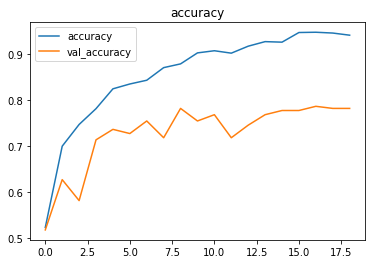

In [89]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

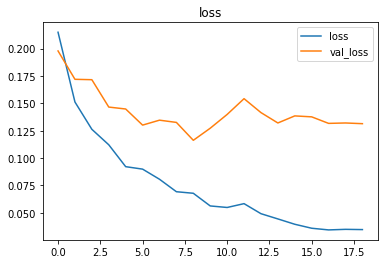

In [85]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

# Evaluate

In [90]:
model.evaluate(gen_test)

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

1/3 [=========>....................] - ETA: 13s - loss: 0.1199 - accuracy: 0.7812

  0%|          | 0/32 [00:00<?, ?it/s]

3/3 [==============================] - 16s 4s/step - loss: 0.1153 - accuracy: 0.8000


[0.11531426012516022, 0.800000011920929]

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict(gen_test)
y_pred = np.argmax(prediction, axis=-1) # [0, 1, 2, ...]

y_true = []
for img_test, y_test in gen_test:
  y_true.extend(y_test.argmax(axis = -1))
  print(y_true)
y_true = np.array(y_true)

print(y_true.shape, y_pred.shape)

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

1/3 [=========>....................] - ETA: 12s

  0%|          | 0/32 [00:00<?, ?it/s]

3/3 [==============================] - 16s 5s/step


  0%|          | 0/64 [00:00<?, ?it/s]

ValueError: ignored

  0%|          | 0/64 [00:00<?, ?it/s]

[[[ 18  66   4]
  [ 15  62   6]
  [ 12  59   4]
  ...
  [ 66 149  32]
  [ 67 151  30]
  [ 74 160  37]]

 [[ 14  62   4]
  [ 12  59   4]
  [ 15  62   2]
  ...
  [ 74 160  42]
  [ 77 162  41]
  [ 88 174  51]]

 [[ 11  58   4]
  [ 17  64   8]
  [ 17  69   1]
  ...
  [ 78 164  41]
  [ 81 167  44]
  [ 75 160  39]]

 ...

 [[ 93 114  21]
  [ 99 120  30]
  [ 98 122  28]
  ...
  [ 68 118  21]
  [ 60 114  16]
  [ 56 111  10]]

 [[ 89 109  22]
  [ 97 119  22]
  [100 122  22]
  ...
  [ 54 106   6]
  [ 54 105   5]
  [ 52 109   4]]

 [[100 122  22]
  [ 96 120  22]
  [100 125  24]
  ...
  [ 52 106   3]
  [ 51 106   2]
  [ 51 108   3]]]


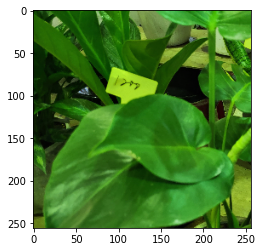

In [40]:
a = gen_test[0][0][0]
a += 1.
a * 127.5
a = np.array(a, dtype = np.uint8)
print(a)
plt.imshow(a)

In [ ]:
# classification_report
print(classification_report(y_true, y_pred))

In [ ]:
import pandas as pd
# Confusion matrix:
#   row: Ground truth
#   column: predict
mat = confusion_matrix(y_true, y_pred)
pd.DataFrame(mat,
      columns=["{}(predict)".format(all_class[i]) for i in range(5)],
      index=["{}(true)".format(all_class[i]) for i in range(5)])

In [ ]:
plt.figure(figsize=(14, 14))

idx = np.nonzero(y_pred != y_true)[0]

false_pre = y_pred[idx]
false_true = y_true[idx]
false_img = gen_test[idx//BATCH_SIZE][0][idx%BATCH_SIZE]
false_img += 1.
false_img * 127.5
false_img = np.array(a, dtype = np.uint8)

width = 5
height = len(idx) // width + 1

for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[T]:{}".format(all_class[false_pre[i]], all_class[false_true[i]])
    plt.title(title)
    plt.axis("off")
    for j in range(len(false_img)):
        false_img[j]
    plt.imshow(false_img[i].astype(int))

# Load model

In [45]:
# 1. load whole model and weights
model = models.load_model('/content/drive/MyDrive/generator_v2.h5')
# 2. Rebuild model before load weights !
# model2 = MyModel()
# model2.load_weights('CLF_model_weights.h5')

# Predict image

輸入一個網址https://cdn02.pinkoi.com/wp-content/uploads/sites/7/2022/07/02154609/%E9%BE%9C%E8%83%8C%E8%8A%8B.jpg


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


1/1 [==============================] - 5s 5s/step
MD_Normal 的機率: 0.36226586
MD_old_water 的機率: 0.22663692
MD_sunburnt 的機率: 0.05112736
MD_bac_fungi 的機率: 0.036684945
Others 的機率: 0.32328483
答案是: MD_Normal


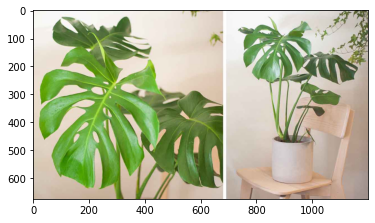

In [46]:
import requests

url = input("輸入一個網址")
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36"
}

response = requests.get(url, stream=True, verify=False, headers=h)
img = Image.open(response.raw)
img_r = img.convert("RGB").resize((256, 256))
img_r = np.array(img_r).reshape(1, 256, 256, 3)
img_r = tf.keras.applications.efficientnet_v2.preprocess_input(img_r, data_format=None)
proba = model.predict(img_r)[0]
for t, p in zip(all_class, proba):
    print(t, "的機率:", p)
ans = all_class[proba.argmax(axis=-1)]
print("答案是:", ans)
plt.imshow(img)